In [1]:
import numpy as np
import cv2
import keras
from keras.models import Sequential
from keras import layers
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.utils import np_utils
# from keras.regularizers import l2, activity_l2
from keras.optimizers import SGD, RMSprop
import matplotlib.pyplot as plt

np.random.seed(2222)  # for reproducibility

Using TensorFlow backend.


In [2]:
#Setting up working directory
import os
main_path = os.getcwd()
cwd = main_path + "/Train"
os.chdir(cwd)
print(main_path)
print(cwd)

C:\Users\Gemini Siva Srinivas\Desktop\New folder (3)
C:\Users\Gemini Siva Srinivas\Desktop\New folder (3)/Train


In [3]:
#Function defined that takes the paths of images and coordinates of BBoxes as inputs and returns the cropped images
def fun(path,first,last): #cwd global variable 
    im = cv2.imread(cwd + "/" + path) 
#     print(cwd+path)
#     cv2.imshow('image',im) 
#     cv2.waitKey(0) 
#     cv2.destroyAllWindows() 

    img = im[first[1]:last[1],first[0]:last[0]] 
#     cv2.imshow('image',img) 
#     cv2.waitKey(0) 
#     cv2.destroyAllWindows() 
    return img

In [4]:
#extraction of training images
X_train = []
file = open('train.txt',encoding = "utf8")
labels = []
for line in file:
    x = line.split(',')
    path = x[0]
    first = [int(x[1]),int(x[2])]
    last = [int(x[3]),int(x[4])]
    if x[5]=='A\n':
        x[5]=0
    if x[5]=='B\n':
        x[5]=1
    if x[5]=='C\n':
        x[5]=2
    if x[5]=='D\n':
        x[5]=3
    labels.append(x[5])
    img = fun(path,first,last)
#     print(img.shape)
    X_train.append(img)

i = 1
X_tr = []
for file in X_train:
    #X_train = np.array(X_train)
#     print(i)
#     print(file.shape)
    
    dim = (450,357)
    file = cv2.resize(file,dim,interpolation = cv2.INTER_AREA) #File Resizing
#     print(file.shape)
    X_tr.append(file)
    
    #convert labels to one-hot-encoding
    Y_tr_labels = np_utils.to_categorical(labels)
    i=i+1
    
# print(X_train)
#print(labels)

In [5]:
#extraction of test images
test_list = ['\pic_0000.jpg','\pic_0001.jpg','\pic_0002.jpg','\pic_0003.jpg','\pic_0004.jpg','\pic_0005.jpg','\pic_0006.jpg','\pic_0007.jpg','\pic_0008.jpg','\pic_0009.jpg','\pic_0010.jpg']
folder_list = ['/t1','/t2','/t3','/t4']

X_test = []
Y_test=[]
test_path = main_path+'\Test'
for  j in range(4):
    for i in range(11):
        file_path = test_path+folder_list[j]+test_list[i]
        img = cv2.imread(file_path)
#         cv2.imshow('image',img) 
#         cv2.waitKey(0) 
#         cv2.destroyAllWindows()
        dim = (450,357)
        file2 = cv2.resize(img,dim,interpolation = cv2.INTER_AREA)
        X_test.append(file2)
        if j==2:
            Y_test.append(3)
        elif j==3:
            Y_test.append(2)
        else:
            Y_test.append(j)
        

In [6]:
print(np.array(X_test).shape)
Y_test_labels = np_utils.to_categorical(Y_test)
print(Y_test_labels.shape)


(44, 357, 450, 3)
(44, 4)


c:\users\rakesh\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:24: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 1334 samples, validate on 44 samples
Epoch 1/20
1334/1334 [==============================] - 6s 4ms/step - loss: 3.9586 - acc: 0.4025 - val_loss: 1.5819 - val_acc: 0.2955
Epoch 2/20
1334/1334 [==============================] - 4s 3ms/step - loss: 1.1606 - acc: 0.4895 - val_loss: 2.7842 - val_acc: 0.2955
Epoch 3/20
1334/1334 [==============================] - 4s 3ms/step - loss: 0.7878 - acc: 0.6844 - val_loss: 2.7972 - val_acc: 0.3636
Epoch 4/20
1334/1334 [==============================] - 4s 3ms/step - loss: 0.3926 - acc: 0.8696 - val_loss: 4.3092 - val_acc: 0.4545
Epoch 5/20
1334/1334 [==============================] - 4s 3ms/step - loss: 0.1883 - acc: 0.9430 - val_loss: 5.2424 - val_acc: 0.3636
Epoch 6/20
1334/1334 [==============================] - 4s 3ms/step - loss: 0.1157 - acc: 0.9625 - val_loss: 5.7735 - val_acc: 0.4318
Epoch 7/20
1334/1334 [==============================] - 4s 3ms/step - loss: 0.0941 - acc: 0.9790 - val_loss: 4.9345 - val_acc: 0.3636
Epoch 8/20
1334/

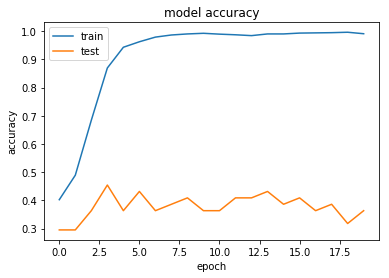

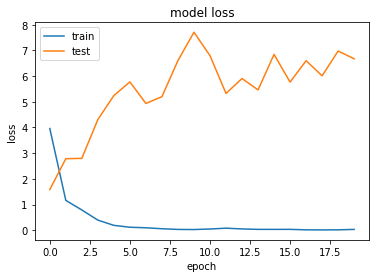

In [17]:
#Training of CNN

X_tr = np.array(X_tr)

#LeNet Architecture
model = Sequential()

model.add(layers.Conv2D(filters=5, kernel_size=(7, 7), activation='relu', input_shape=(357,450,3)))
model.add(layers.AveragePooling2D())

model.add(layers.Conv2D(filters=3, kernel_size=(5, 5), activation='relu'))
model.add(layers.AveragePooling2D())

model.add(layers.Flatten())

model.add(layers.Dense(units=120, activation='relu'))
#model.add(Dropout(0.5))
model.add(layers.Dense(units=84, activation='relu'))
model.add(Dropout(0.2))
model.add(layers.Dense(units=4, activation = 'softmax'))

sgd = SGD(lr=0.055, decay=1e-6, momentum=0.9, nesterov=True)
#optm = RMSprop(lr=0.004, rho=0.9, epsilon=1e-08, decay=0.0)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics= ['accuracy'])

history = model.fit(X_tr,Y_tr_labels , batch_size=32 , nb_epoch=20,validation_data = (np.array(X_test),Y_test_labels)

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [18]:
loss, accuracy = model.evaluate(np.array(X_test), Y_test_labels, verbose=0)
print('Accuracy: %f' % (accuracy))
print('Loss: %f' % (loss))

Accuracy: 0.363636
Loss: 6.673810


In [29]:
#Saving the trained model
model.save('mymodel.h5')

In [30]:
#Saving the architecture and weights of the trained model
import h5py
json_string = model.to_json()
model.save_weights('mymodel_weights.h5')
open('mymodel_architecture.json', 'w').write(json_string)
model.save_weights('mymodel_weights.h5')

In [7]:
#Prediction of test images
import h5py
from keras.models import load_model
model = load_model('mymodel.h5')
#print(model.summary())

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model.load_weights('mymodel.h5')


img_class = model.predict_classes(np.array(X_test))

for i in range(0,len(img_class)):
    prediction = img_class[i]
    classname = img_class[i]
    print("Class: ",classname)

    plt.imshow(X_test[i])
    plt.title(classname)
    plt.show()
    

for i in range(len(img_class)):
    path = ''
    if img_class[i] == 0:
        path = test_path + '/t1/'
        
    if img_class[i] == 1:
        path = test_path + '/t2/'
    if img_class[i] == 2:
        path = test_path + '/t3/'
    if img_class[i] == 3:
        path = test_path + '/t4/'
#     print(path)
    cv2.imwrite(os.path.join(path , 'pred_'+str(i)+'.jpg'),X_test[i])


OSError: Unable to open file (unable to open file: name = 'mymodel.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)